# DETEKSI UJARAN KEBENCIAN DI MEDIA SOSIAL

**Suci Dwi Lestari (09011181722021)**

**SK5A**

Ujaran kebencian (Hate Speech) adalah perkataan, tulisan, ataupun perbuatan yang dapat memicu emosional, kemarahan, ataupun kesalahpahaman yang disebarkan melalui berbagai media baik online ataupun offline. Saat ini, penggunaan media online (internet) merupakan hal biasa bagi masyarakat. Namun, kurangnya mengetahui etika dalam ber-internet sehingga kadang tidak mengetahui jika apa yang ia lontarkan merupakan hate speech. Etika dalam dunia online perlu ditegaskan, mengingat dunia online merupakan hal yang sudah dianggap penting bagi masyarakat dunia. Namun, semakin banyak pihak yang menyalahgunakan dunia maya untuk menyebarluaskan hal-hal yang tidak lazim mengenai sesuatu, seperti suku bangsa, agama, dan ras. Penyebaran berita yang sifatnya fitnah di dunia Internet, misalnya, menjadi hal yang patut diperhatikan.

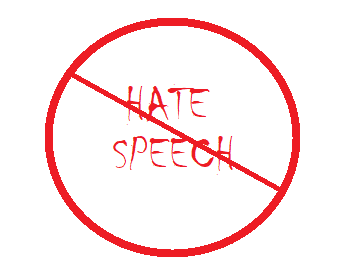

# DATASET

Dataset yang digunakan ialah data tweet yang terdiri dari 3 atribut yaitu hate speech (jumlah pengguna Crowd Flower yang menilai tweet sebagai hate speech/ujaran kebencian), offensive language (jumlah pengguna Crowd Flower yang menilai tweet itu ofensif), dan neither (jumlah pengguna Crowd Flower yang menilai tweet itu tidak ofensif atau non-ofensif). Data set dilihat dari suatu teks pendek dan mengidentifikasi jika a) berisi ujaran kebencian (hate sppech), b) menyinggung tetapi tanpa ucapan kebencian (offensive), atau c) sama sekali tidak menyinggung (neither). Berisi hampir 15 ribu baris dengan tiga penilaian per string teks. Dataset ini juga berisi satu kelas label yaitu apakah ia termasuk ke dalam hate speech, offensive, ataupun neither (tidak sama sekali). Crowd Flower sendiri ialah perusahaan pembelajaran mesin dan kecerdasan buatan manusia yang berbasis in the loop di San Francisco.Dataset didapatkan dari situs (https://data.world/crowdflower/hate-speech-identification)

**Mengimport Library yang akan digunakan**

In [1]:
import pandas as pd
import numpy as np
import pickle
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk 
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.stem.porter import *
import string
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as VS
from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Loading dataset

In [2]:
df = pd.read_csv("C:/Users/User/Downloads/hate-speech-and-offensive-language-master/data/labeled_data.csv")

**Melihat Isi Dataset**

In [25]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


**Melihat info dan deskripsi dari dataset**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
Unnamed: 0            24783 non-null int64
count                 24783 non-null int64
hate_speech           24783 non-null int64
offensive_language    24783 non-null int64
neither               24783 non-null int64
class                 24783 non-null int64
tweet                 24783 non-null object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [27]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [28]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

**Plotting kelas dari dataset**

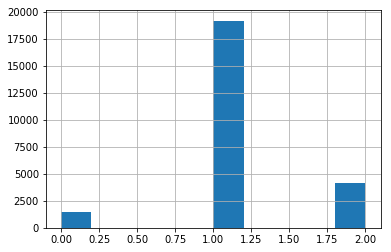

In [29]:
df['class'].hist()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


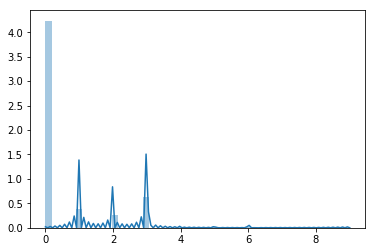

In [30]:
import seaborn as sns
neither = [df['neither'].values]
sns.distplot(neither)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


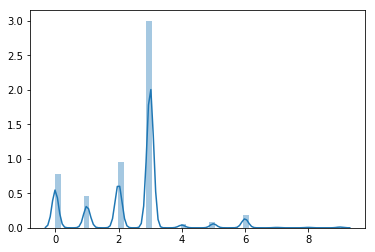

In [31]:
offensive_language = [df['offensive_language'].values]
sns.distplot(offensive_language)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


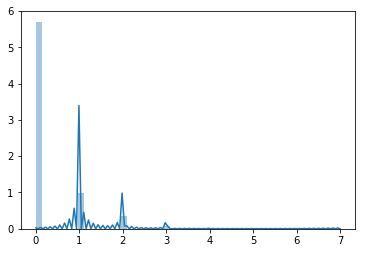

In [32]:
hate_speech = [df['hate_speech'].values]
sns.distplot(hate_speech)

In [33]:
tweets=df.tweet

## Feature generation

In [4]:
#Mendownload dan memeriksa daftar kata pada yang ada (vocabulary)
stopwords=stopwords = nltk.corpus.stopwords.words("english")

other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)

#Melakukan proses stemming (penggunaan kata dasar)
stemmer = PorterStemmer()


#Menerima string teks dan menggantikan bagian url dengan URLHERE , banyaknya whitespace dengan satu instance dan menyebutkan dengan MENTIONHERE.
#Ini memungkinkan untuk mendapatkan jumlah url dan sebutan standar dan tidak memedulikan dengan orang yang disebutkan
def preprocess(text_string):
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(giant_url_regex, '', parsed_text)
    parsed_text = re.sub(mention_regex, '', parsed_text)
    return parsed_text

#Menghapus tanda baca & spasi kosong, menyetel ke huruf kecil, dan stem tweets. Mengembalikan daftar token yang telh di-stem
def tokenize(tweet):
    tweet = " ".join(re.split("[^a-zA-Z]*", tweet.lower())).strip()
    tokens = [stemmer.stem(t) for t in tweet.split()]
    return tokens

#Sama seperti yang diatas akan tetapi tidak adanya proses stemming.
def basic_tokenize(tweet):
    tweet = " ".join(re.split("[^a-zA-Z.,!?]*", tweet.lower())).strip()
    return tweet.split()

vectorizer = TfidfVectorizer(
    tokenizer=tokenize,
    preprocessor=preprocess,
    ngram_range=(1, 3),
    stop_words=stopwords,
    use_idf=True,
    smooth_idf=False,
    norm=None,
    decode_error='replace',
    max_features=10000,
    min_df=5,
    max_df=0.75
    )

Dapat dilihat jika untuk bagian ini terjadilah proses stemming yang dimana kata-kata akan direduksi menjadi root (dasar) dengan menghapus inflectionnya melalui dropping karakter-karakter yang tidak diperlukan. Terjadilah pula proses tokenize yaitu menghapus tanda baca & spasi kosong, menyetel ke huruf kecil, dan stem tweets serta mengembalikan daftar token yang telah di-stem. Tokenize sendiri mengubah kalimat menjadi kata-kata.

**Warning Control**

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Warning control digunakan untuk mengingatkan tentang beberapa kondisi dalam suatu program. Dimana kondisi tersebut tidak menjamin menimbulkan pengecualian ataupun menghentikan program itu sendiri.

**Bag of Words(BOW)**

Salah satu teknik paling sederhana untuk merepresentasikan teks secara numerik adalah dengan Bag of Words

In [48]:
#Membuat matriks tfidf dan mendapatkan skor yang relevan.
tfidf = vectorizer.fit_transform(tweets).toarray()
vocab = {v:i for i, v in enumerate(vectorizer.get_feature_names())}
idf_vals = vectorizer.idf_
idf_dict = {i:idf_vals[i] for i in vocab.values()} #indeks; nilai skor IDF 

TF (Term Frequency) IDF (Inverse Document Frequency), pada proses kali ini dilakukan pembuatan matriks daripada TF-IDF serta mendapatkan skor yang relevan.

In [49]:
#Mendapatkan tag posting untuk tweet dan menyimpannya sebagai string
tweet_tags = []
for t in tweets:
    tokens = basic_tokenize(preprocess(t))
    tags = nltk.pos_tag(tokens)
    tag_list = [x[1] for x in tags]
    tag_str = " ".join(tag_list)
    tweet_tags.append(tag_str)

In [50]:
#Menggunakan verktor TFIDF untuk mendapatkan token matrix pada tag postingan
pos_vectorizer = TfidfVectorizer(
    tokenizer=None,
    lowercase=False,
    preprocessor=None,
    ngram_range=(1, 3),
    stop_words=None,
    use_idf=False,
    smooth_idf=False,
    norm=None,
    decode_error='replace',
    max_features=5000,
    min_df=5,
    max_df=0.75,
    )

In [51]:
#Membuat pos TF matrix dan mendapatkan kamus kosa kata
pos = pos_vectorizer.fit_transform(pd.Series(tweet_tags)).toarray()
pos_vocab = {v:i for i, v in enumerate(pos_vectorizer.get_feature_names())}

In [53]:
#Mendapatkan features lainnya
sentiment_analyzer = VS()

def count_twitter_objs(text_string):
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    hashtag_regex = '#[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(giant_url_regex, 'URLHERE', parsed_text)
    parsed_text = re.sub(mention_regex, 'MENTIONHERE', parsed_text)
    parsed_text = re.sub(hashtag_regex, 'HASHTAGHERE', parsed_text)
    return(parsed_text.count('URLHERE'),parsed_text.count('MENTIONHERE'),parsed_text.count('HASHTAGHERE'))

def other_features(tweet):
    sentiment = sentiment_analyzer.polarity_scores(tweet)
    
    words = preprocess(tweet) #Hanya mendapatkan dalam bentuk teks
    
    syllables = textstat.syllable_count(words)
    num_chars = sum(len(w) for w in words)
    num_chars_total = len(tweet)
    num_terms = len(tweet.split())
    num_words = len(words.split())
    avg_syl = round(float((syllables+0.001))/float(num_words+0.001),4)
    num_unique_terms = len(set(words.split()))
    
    #Modifikasi nilai FK, di mana rata-rata kata per kalimat hanya nomor kata / 1
    FKRA = round(float(0.39 * float(num_words)/1.0) + float(11.8 * avg_syl) - 15.59,1)
    ##Modifikasi nilai FRE , yang mana kalimat ditetapkan ke 1
    FRE = round(206.835 - 1.015*(float(num_words)/1.0) - (84.6*float(avg_syl)),2)
    
    twitter_objs = count_twitter_objs(tweet)
    retweet = 0
    if "rt" in words:
        retweet = 1
    features = [FKRA, FRE,syllables, avg_syl, num_chars, num_chars_total, num_terms, num_words,
                num_unique_terms, sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound'],
                twitter_objs[2], twitter_objs[1],
                twitter_objs[0], retweet]
    #features = pandas.DataFrame(features)
    return features

def get_feature_array(tweets):
    feats=[]
    for t in tweets:
        feats.append(other_features(t))
    return np.array(feats)

Pada bagian ini ialah menerima string teks dan menggantikan, url dengan URLHERE, banyak white space dengan satu instance , menggantikan mention dengan MENTIONHERE, dan menggantikan hastag dengan HASHTAGHERE. Hal ini memungkinkan untuk mendapatkan jumlah url dan mention tanpa memedulikan mention orang tertentu. Juga pada bagian ini, mengembalikan jumlah url, mention, dan tagar.
Serta pada bagian ini terdapat fungsi mengambil string dan mengembalikan daftar dari fitur. Termasuk pula skor Sentimen, skor Teks dan Keterbacaan, serta fitur khusus pada Twitter.

In [12]:
other_features_names = ["FKRA", "FRE","num_syllables", "avg_syl_per_word", "num_chars", "num_chars_total", \
                        "num_terms", "num_words", "num_unique_words", "vader neg","vader pos","vader neu", \
                        "vader compound", "num_hashtags", "num_mentions", "num_urls", "is_retweet"]

In [13]:
feats = get_feature_array(tweets)

**Menggabungkan semua bagian feature generation**

In [54]:
M = np.concatenate([tfidf,pos,feats],axis=1)

**Mengetahui shape dan isi dari semua fungsi yang telah digabungkan**

In [15]:
M.shape

(24783, 11172)

In [16]:
M

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 2., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

**Mendapatkan list nama variabel**

In [15]:
#Finally get a list of variable names
variables = ['']*len(vocab)
for k,v in vocab.items():
    variables[v] = k

pos_variables = ['']*len(pos_vocab)
for k,v in pos_vocab.items():
    pos_variables[v] = k

feature_names = variables+pos_variables+other_features_names

# Menjalankan model

In [72]:
X = pd.DataFrame(M)
y = df['class'].astype(int)

X adalah variabel yang digunakan untuk mendefinisikan DataFrame (M) yang telah dilakukan di feature generation.

Y adalah dataframe pada label class(kelas).

In [73]:
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout

Untuk bagian train_test_split adalah bagian dari splitting data yang digunakan untuk mencegah terjadinya overfitting pada data.

Pada bagian dense, dropout adalah Model dan Layer, model yang digunakan untuk membuat hidden layer untuk memproses data adalah fungsi Sequential.  Sedangkan layer sendiri menggunakan tipe Dense yang melakukan training dengan menghubungkan setiap Neural Network secara sequential.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.1)

Membagi data menjadi 2 bagian yaitu Training data dan Test Data.

**Categorical**

In [75]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

**Mendefinisikan Model**

In [76]:
model = Sequential()
model.add(Dense(6, input_dim=11172, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model Sequential berfungsi untuk mendefinisikan model sequential() yang ditampung kedalam variabel model.

Input layer/input_dim serta fungsi yang digunakan adalah ReLu (Rectified Linear Unit), dimana cara kerjanya yaitu dengan mengubah setiap nilai input negatif menjadi 0 pada grafik sesegera mungkin.

Fungsi softmax sering digunakan pada lapisan akhir dari pengklasifikasian jaringan berbasis saraf. Jaringan seperti ini umumnya ditrain di bawah log loss (atau crossentropy), yang memberikan varian nilai non-linear regresi logistik multinomia.

**Fit Model**

Untuk mendapatkan hasil akurasi dan loss dari dataset, langkah selanjutnya yang harus dilakukan adalah fit model. Dimana pada proses ini terjadi proses training dengan parameter:

    X yang telah di preprocessing
    Y yang telah dikonversi menjadi categorical
    Banyaknya Epochs atau proses training
    batch_size

Disini Epochs atau training yang saya lakukan adalah sebanyak 25 kali.

In [77]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train_one_hot, validation_split=0.25, epochs=25,verbose=1)

Train on 16728 samples, validate on 5576 samples
Epoch 1/25
16728/16728 [==============================] - 76s 5ms/step - loss: 0.7347 - accuracy: 0.7637 - val_loss: 0.5358 - val_accuracy: 0.7710
Epoch 2/25
16728/16728 [==============================] - 11s 655us/step - loss: 0.5792 - accuracy: 0.7752 - val_loss: 0.4986 - val_accuracy: 0.7710
Epoch 3/25
16728/16728 [==============================] - 9s 512us/step - loss: 0.5318 - accuracy: 0.7752 - val_loss: 0.4908 - val_accuracy: 0.7710
Epoch 4/25
16728/16728 [==============================] - 8s 471us/step - loss: 0.5111 - accuracy: 0.7752 - val_loss: 0.4792 - val_accuracy: 0.7710
Epoch 5/25
16728/16728 [==============================] - 8s 475us/step - loss: 0.4982 - accuracy: 0.7753 - val_loss: 0.4899 - val_accuracy: 0.7710
Epoch 6/25
16728/16728 [==============================] - 8s 481us/step - loss: 0.4881 - accuracy: 0.7752 - val_loss: 0.4806 - val_accuracy: 0.7715
Epoch 7/25
16728/16728 [==============================] - 8s 46

**Memprediksi Model**

Prediksi model diambil dari nilai pada data X yang telah di preprocessing, dimana nantinya nilai prediksi tersebut digunakan sebagai parameter confusion matrix.

In [78]:
predict = model.predict(X_train)
predict

array([[1.16170495e-08, 1.00000000e+00, 1.39875741e-12],
       [2.13703475e-04, 9.99779642e-01, 6.72299984e-06],
       [7.02595478e-03, 9.91459370e-01, 1.51461677e-03],
       ...,
       [3.89934030e-05, 9.99960542e-01, 4.54369882e-07],
       [1.09386782e-07, 9.99999881e-01, 4.78202061e-11],
       [9.61012580e-03, 9.87762213e-01, 2.62767449e-03]], dtype=float32)

**Evaluasi Model**

Secara umum, performa dari proses model neural network untuk dataset yang dibuat telah dilihat dengan menampilkan akurasinya. hanya saja, untuk performa lain seperti Precisision, Spesificity, dan Sensitivity belum dapat diketahui. karena membutuhkan fungsi yang berbeda, yaitu confusion matrix.

**Akurasi Training**

In [79]:
scores = model.evaluate(X_train, y_train_one_hot)
print("AKURASI TRAINING :: %.2f%%"%(scores[1]*100))

22304/22304 [==============================] - 7s 293us/step
AKURASI TRAINING :: 92.11%


**Performance**

Setelah mendapatkan hasil singkat dari proses training pada model diatas, selanjutnya dapat dilakukan analisis performance dengan membuat confusion matrix dari Y yang telah diubah menjadi categorical dan nilai prediksi dari model neural network terhadap X yang telah di preprocessing.

In [80]:
from sklearn.metrics import confusion_matrix
Confussion_Matrix = confusion_matrix(y_train_one_hot.argmax(axis=1), predict.argmax(axis=1))

In [81]:
print (Confussion_Matrix)

[[    0  1254    27]
 [    0 17168    99]
 [    0   379  3377]]


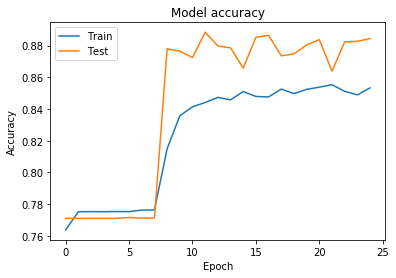

In [86]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

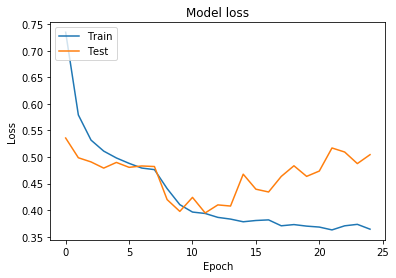

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()